In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

euro_players = pd.read_csv("euro2024_players.csv")
euro_players.head()


,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [3]:
euro_players.info()

#The database has the following columns:
    #Name - The name and surname of each football player
    #Position - The position the player plays on the field
    #Age - Age of player at time of the Euro Football Champs 2024
    #Club - The club the player plays for normally
    #Height - The height of the football player
    #Foot - Which foot they kick with, Left, Right, BOth or unknown
    #Caps - How many caps the football player has been awarded
    #Goals - How many goals the football player has scored in his career
    #MarketValue - Current Market Value for the football PLayer
    #Country - The counry the football player is playing for at the Euro 2024 champs


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [4]:
left_foot_avg = np.mean(euro_players.Foot == "left")
right_foot_avg = np.mean(euro_players.Foot == "right")
both_feet_avg = np.mean(euro_players.Foot == "both")

print("Average number of players that are left Footed = " + str(round(left_foot_avg,2)))
print("Average number of players that are right Footed = " + str(round(right_foot_avg,2)))
print("Average number of players that are can use both feet = " + str(round(both_feet_avg,2)))


Average number of players that are left Footed = 0.24
Average number of players that are right Footed = 0.7
Average number of players that are can use both feet = 0.05


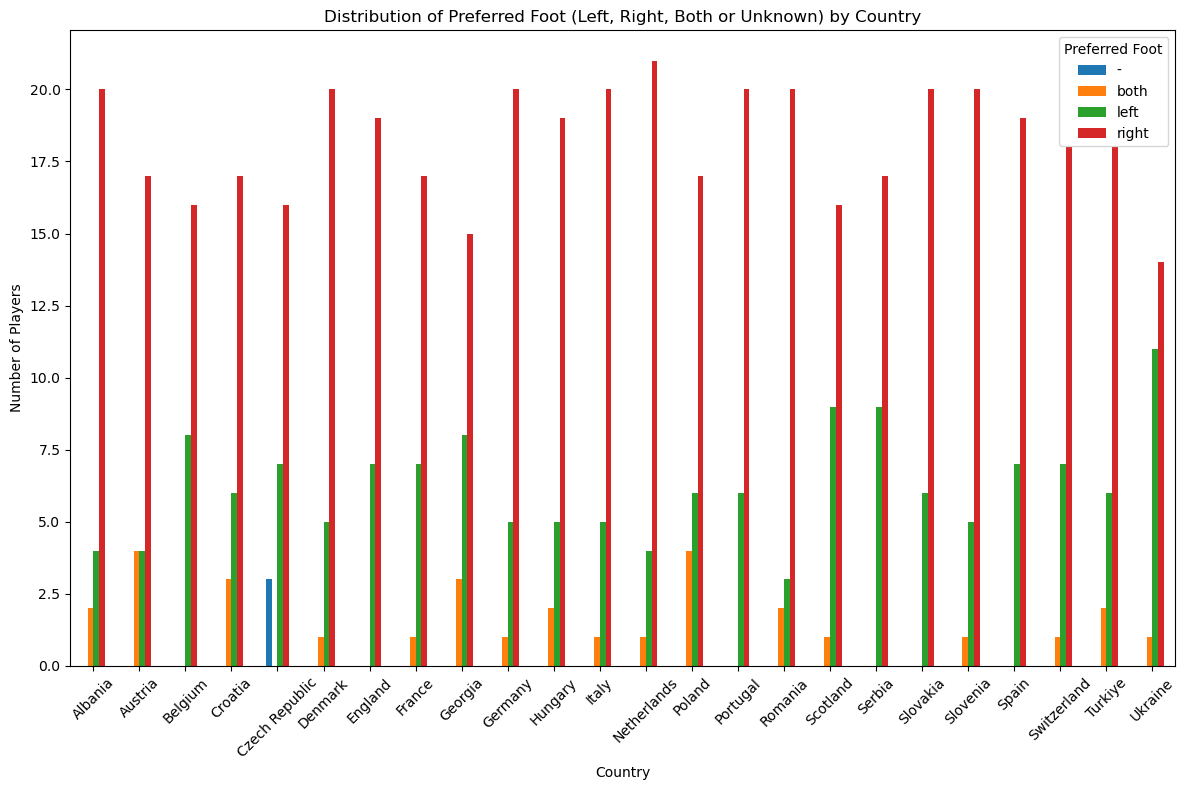

In [5]:
#Create a Bar chart showing foot preference for each country

# Grouping the data by 'Country' and 'Foot', then counting the occurrences
foot_counts = euro_players.groupby(['Country', 'Foot']).size().unstack(fill_value=0)

# Plotting the histogram
foot_counts.plot(kind='bar', stacked=False, figsize=(12, 8))

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Distribution of Preferred Foot (Left, Right, Both or Unknown) by Country')
plt.xticks(rotation=45)
plt.legend(title='Preferred Foot')
plt.tight_layout()

# Display the plot
plt.show()

#As you can see above with the mean calcs and here below on the graph, right foot preference is predominant as on average  
#only 24% of players use thier left and 5% can use both.


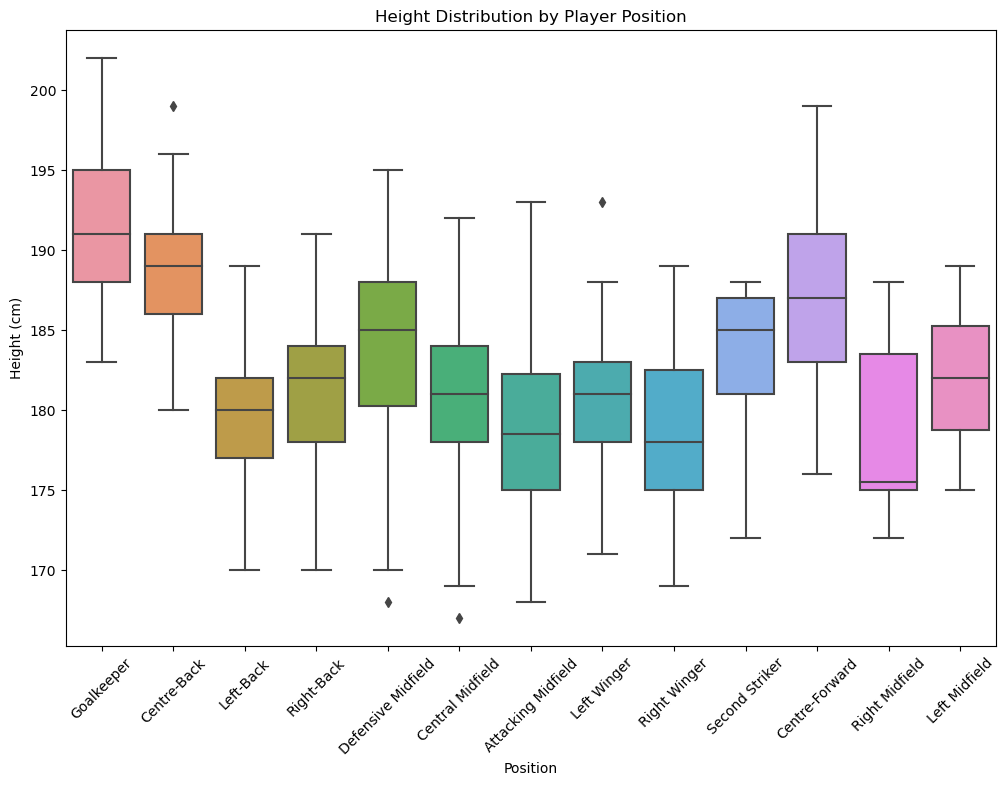

In [6]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='Height', data=euro_players)

# Set the title and labels
plt.title('Height Distribution by Player Position')
plt.xlabel('Position')
plt.ylabel('Height (cm)')

# Show the plot
plt.xticks(rotation=45)
plt.show()

#As seen in this box plot, the tallest players are generally Goalkeepers and then center positions are next. 

The player with the highest Market Value is Jude Bellingham with a value of 180000000
The player with the lowest Market Value is Giorgi Loria with a value of 50000
The average Market Value is 18409028.89
The Median Value is 9000000.0


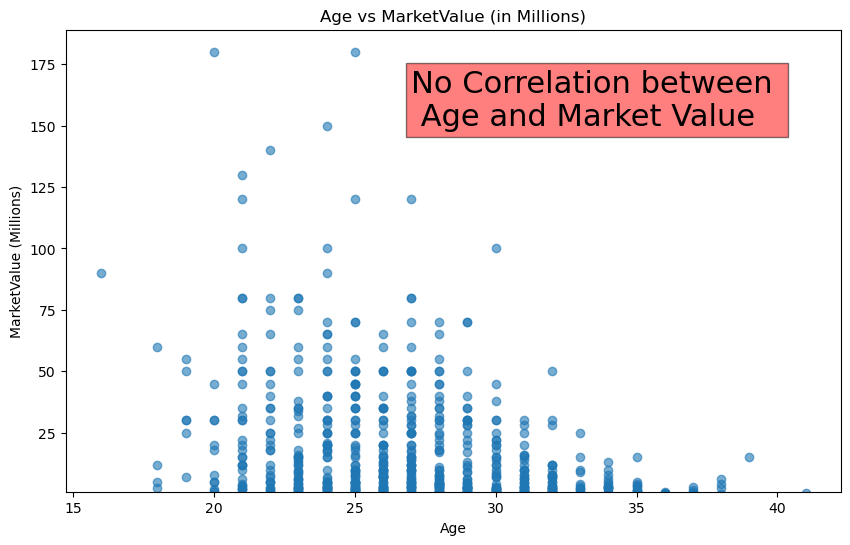

The correlation between a players age and thier Market Value is -0.33 , which proves that the one is not related to the other


In [11]:
#Sort database by MarketValue to get highest and lowest
value_sorted = euro_players.sort_values(by="MarketValue", ascending=True)
highest_value = value_sorted['MarketValue'].iloc[-1]
lowest_value = value_sorted['MarketValue'].iloc[0]
print("The player with the highest Market Value is " +  str(value_sorted['Name'].iloc[-1]) + " with a value of " + str(highest_value))
print("The player with the lowest Market Value is " +  str(value_sorted['Name'].iloc[0]) + " with a value of " + str(lowest_value))
print("The average Market Value is " + str(round(np.mean(value_sorted['MarketValue']),2)))
print("The Median Value is " + str(round(np.median(value_sorted['MarketValue']),2)))

# Convert MarketValue to millions
euro_players['MarketValueMillions'] = euro_players['MarketValue'] / 1e6

# Scatter plot for 'Age' vs 'MarketValueMillions'
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(euro_players['Age'], euro_players['MarketValueMillions'], alpha=0.6)

# Adding title and labels
plt.title('Age vs MarketValue (in Millions)')
plt.xlabel('Age')
plt.ylabel('MarketValue (Millions)')
plt.text(27,150, 'No Correlation between \n Age and Market Value', fontsize = 22, bbox = dict(facecolor = 'red', alpha = 0.5))

# Set the y-axis to start at 1
plt.ylim(bottom=1)

# Show plot
plt.show()

value_sorted = euro_players.sort_values(by="MarketValue", ascending=True)

#As this scatterplot shows, there is no correlation between Age and Market Value as there is neither positive or negative 
#association

corr_output = euro_players['MarketValue'].corr(euro_players['Age'])
print("The correlation between a players age and thier Market Value is " + str(round(corr_output,2)) + " , which proves that the one is not related to the other")


In [13]:
avg_player_age = np.mean(euro_players.Age)
ages_sorted = euro_players.sort_values(by="Age", ascending=True)
ages_median = np.median(ages_sorted.Age)
oldest_age = ages_sorted['Age'].iloc[-1]
oldest_name = ages_sorted['Name'].iloc[-1]
oldest_club = ages_sorted['Club'].iloc[-1]
oldest_country = ages_sorted['Country'].iloc[-1]

youngest_age = ages_sorted['Age'].iloc[0]
youngest_name = ages_sorted['Name'].iloc[0]
youngest_club = ages_sorted['Club'].iloc[0]
youngest_country = ages_sorted['Country'].iloc[0]

print("The average players age is " + str(round(avg_player_age, 2)))
print("The median age of the players is " + str(round(ages_median, 2)))
print("The oldest player in the Euro 2024 is " + oldest_name + "and is " +  str(oldest_age) + " years old, plays for " + oldest_club + " and comes from " + oldest_country)
print("The youngest player in the Euro 2024 is " + youngest_name + "and is " +  str(youngest_age) + " years old, plays for " + youngest_club + " and comes from " + youngest_country)


The average players age is 27.04
The median age of the players is 27.0
The oldest player in the Euro 2024 is Pepeand is 41 years old, plays for FC Porto and comes from Portugal
The youngest player in the Euro 2024 is Lamine Yamaland is 16 years old, plays for FC Barcelona and comes from Spain


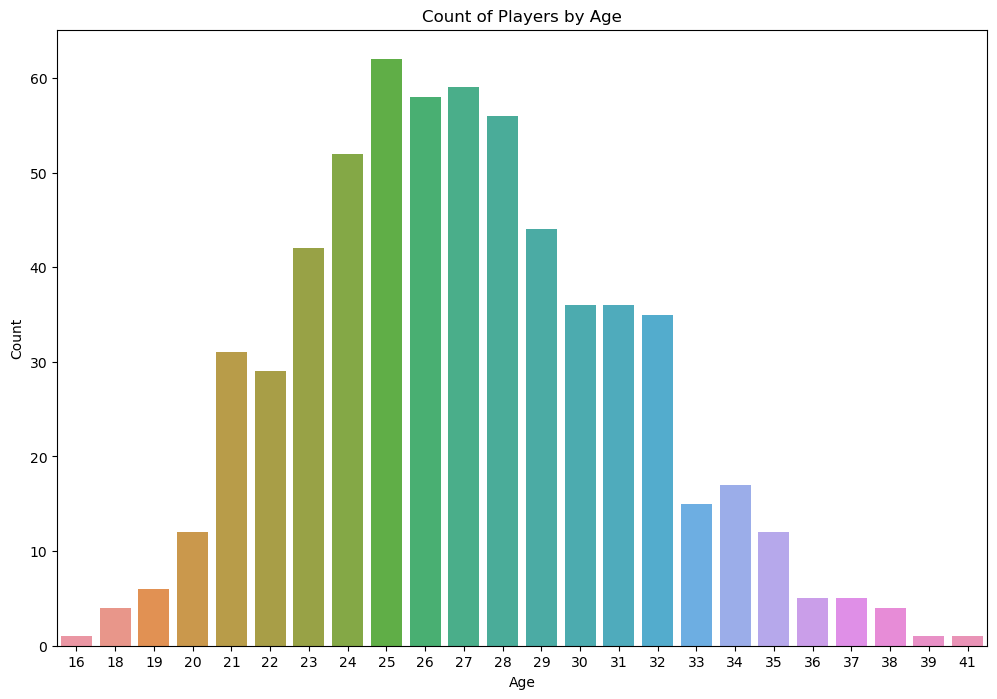

In [14]:
# Setting the plot size
plt.figure(figsize=(12, 8))

# Creating the countplot
sns.countplot(x='Age', data=euro_players)

# Adding title and labels
plt.title('Count of Players by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show plot
plt.show()

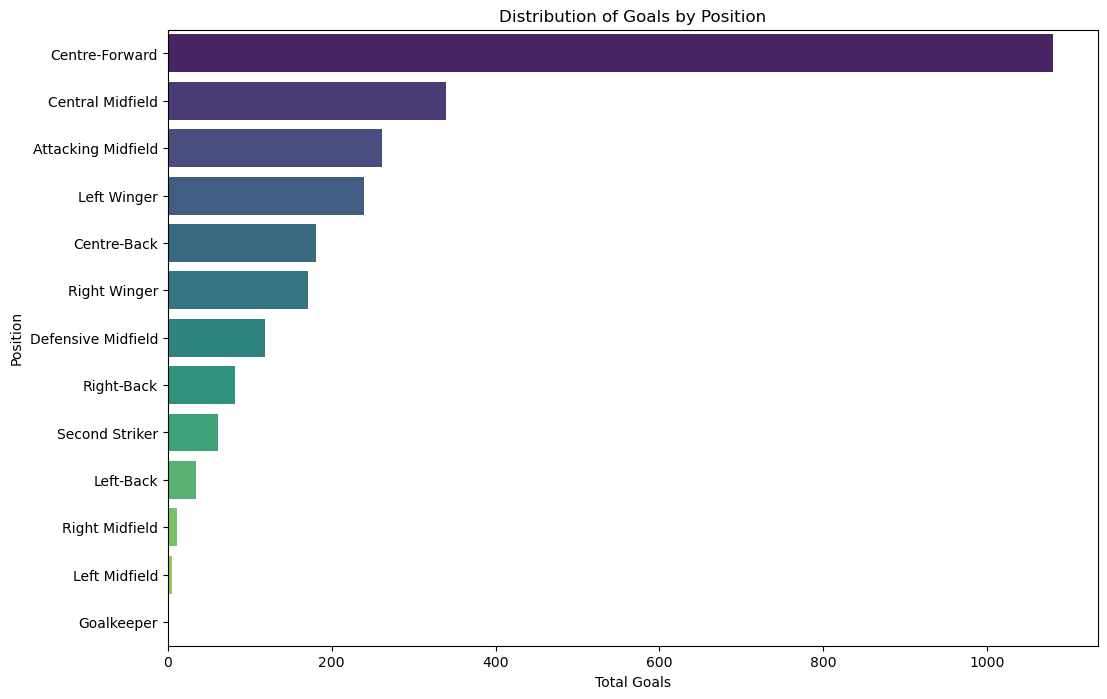

In [15]:
# Aggregate the data to get the sum of goals for each position
position_goals = euro_players.groupby('Position')['Goals'].sum().reset_index()

# Sort the data in descending order based on the total goals
position_goals = position_goals.sort_values(by='Goals', ascending=False)

# Set the plot size
plt.figure(figsize=(12, 8))

# Create the horizontal bar plot
sns.barplot(x='Goals', y='Position', data=position_goals, palette='viridis')

# Add title and labels
plt.title('Distribution of Goals by Position')
plt.xlabel('Total Goals')
plt.ylabel('Position')

# Show plot
plt.show()

#As expected this bar chart proves that the majority of goals scored are from attacking positions and defence positions 
#are not as common

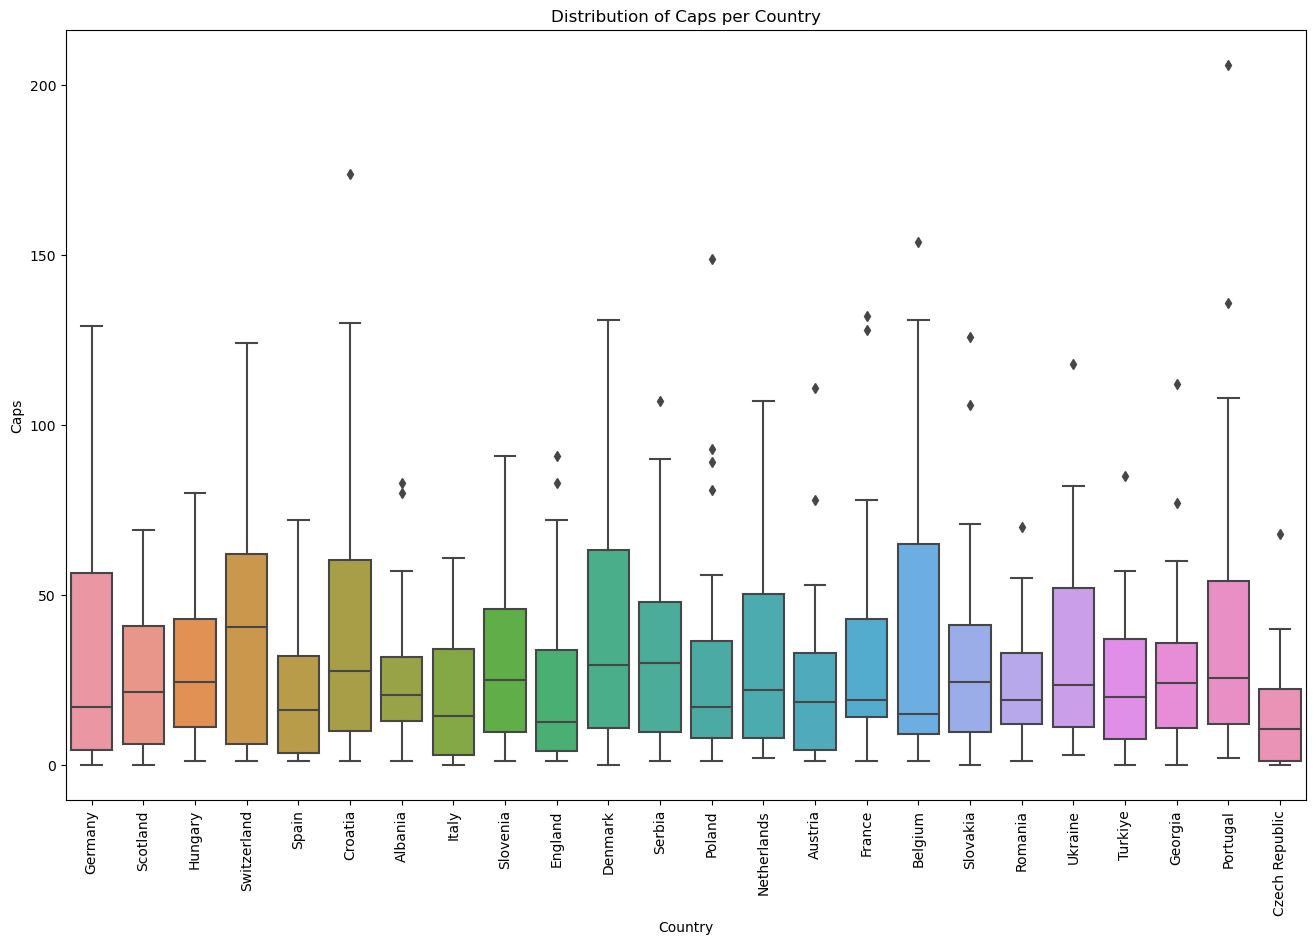

In [16]:
# Set the plot size
plt.figure(figsize=(16, 10))

# Create the boxplot
sns.boxplot(x='Country', y='Caps', data=euro_players)

# Add title and labels
plt.title('Distribution of Caps per Country')
plt.xlabel('Country')
plt.ylabel('Caps')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()